# EDA for Haberman Dataset

**About the Dataset**

Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital between year 1958 to 1970 for the patients who undergone surgery of breast cancer.

Features of Dataset:
* Age of the patient at the time of operation
* Year of operation
* Number of Lymp nodes detected in the patient

Target Variable of Dataset:
* Survival status where 1 = Patient survived more than 5 years and 2 = Patient did not survive uptill 5 years

# Objective

* Find whether the patient will survive uptill 5 years or not after giving the treatment

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas dataFrame.
hb = pd.read_csv("haberman.csv")

In [7]:
print("Number of Data points in the haberman dataset = ", hb.shape[0])
print("Number of features in the haberman dataset = ", hb.shape[1] - 1)# because the last column is the output/dependent variable
hb.head()

Number of Data points in the haberman dataset =  306
Number of features in the haberman dataset =  3


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
#getting the columns in the dataset
hb.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

1    225
2     81
Name: status, dtype: int64


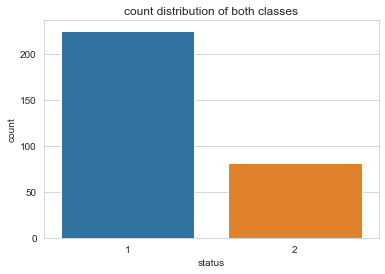

In [123]:
#printing the value counts of different values in output
print(hb["status"].value_counts())

sns.countplot(x = "status", data = hb)
plt.title("count distribution of both classes")
plt.show()

**Observation:**
* Dataset is unbalanced with class (1) having more values
* There are two classes in the output variable

In [76]:
hb.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observations:**
* Average age of patient's were 52 years.
* Average number of axillary nodes were 4.
* 75 percent of patients had age less than 61 years.
* 75 percent of patients had nodes less than equal to 4.

# ***Bi-variate analysis***

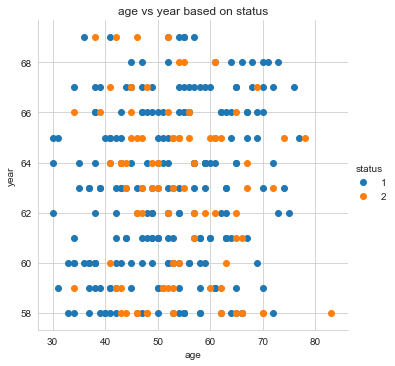

In [121]:
#analysing for two features
sns.set_style("whitegrid")
sns.FacetGrid(hb, hue = "status", height = 5) \
    .map(plt.scatter , "age", "year") \
    .add_legend()
plt.title("age vs year based on status")
plt.show()

#Does not give much of intution as the classes are not well saperated 

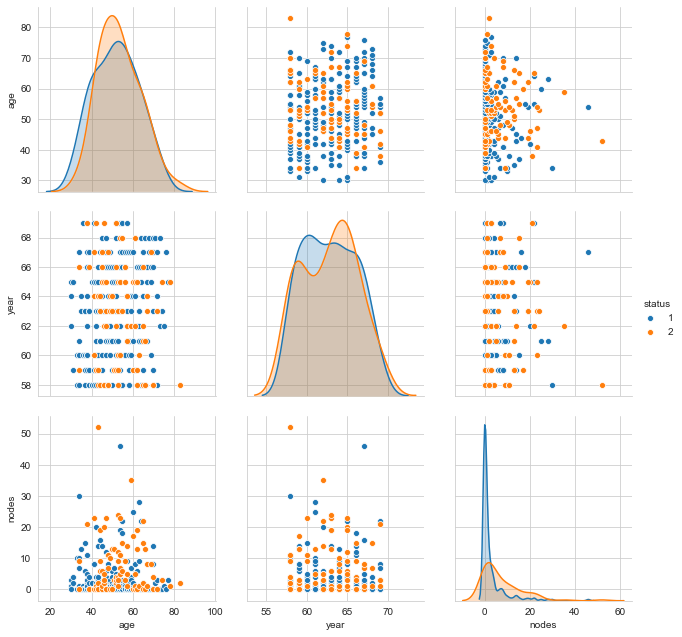

In [64]:
#analysing for two features
sns.set_style("whitegrid")
sns.pairplot(hb, hue = "status", height = 3, vars = ['age', 'year', 'nodes'])
plt.show()

**Obsesrvation**
* Data is highly co-related
* Can't be saperated by simple if-else condition as blue and orange points are not saperated in feature pair plots

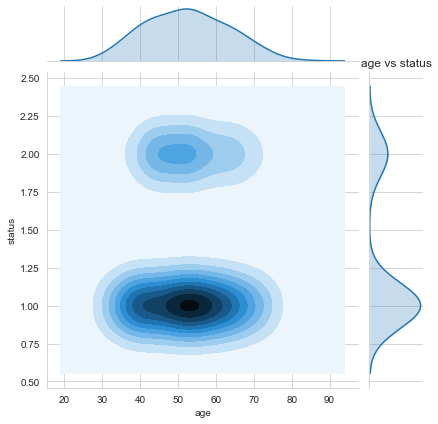

In [109]:
# Contour-plot

sns.jointplot(x="age", y="status", data=hb, kind="kde")
plt.title("age vs status")
plt.show()

**Observation**
* Most of the patients, who lived more than five years had age group of 50-55 years.

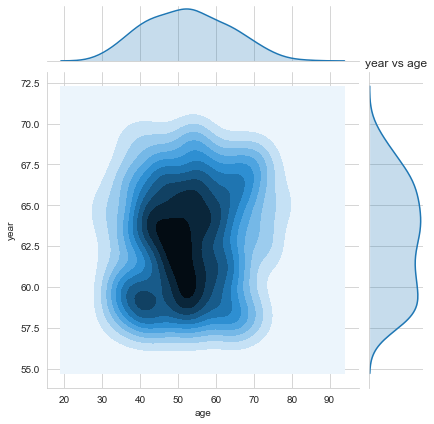

In [111]:
sns.jointplot(x="age", y="year", data=hb, kind="kde")
plt.title("year vs age")
plt.show()

**Observation**
* Most of the people had operated during 1958-1966 and of the age group 42-55.

# ***Tri-Variate analysis***

In [31]:

import plotly.express as px

fig = px.scatter_3d(hb, x='age', y='year', z='nodes',
              color='status')
fig.show()

**Observation**
* Dataset still can't be saperated by simple if-else condition
* The density of number of patients who survived more the 5 years is more when nodes are less

# ***Uni-Variate Analysis***

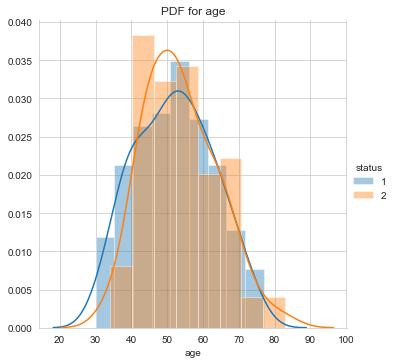

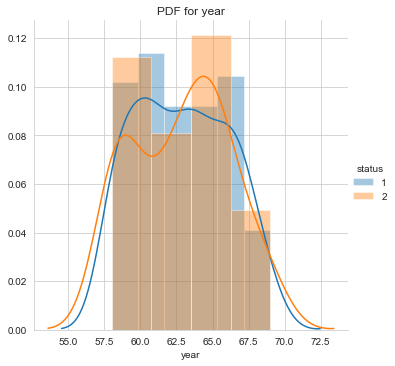

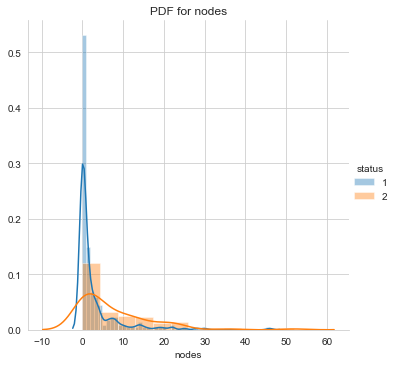

In [122]:
#PDF's
sns.FacetGrid(hb, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.title("PDF for age")
sns.FacetGrid(hb, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.title("PDF for year")
sns.FacetGrid(hb, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.title("PDF for nodes")
plt.show()

**Observation**
* PDF of all the features are overlapping and the maximum per status also comes closeby for all the features
* Distributuion for nodes having status = 1 has less deviation as observed in plot3
* Density of number of patients who survived more than 5 years is more near nodes = 0
* Most of the patients who died within 5 years had age of 40-50 years.
* Most of the patients who died within 5 years, they were operated from 1963-1966.
* Most of the patients who lives more than 5 years, they were operated from 1960-1962.

In [52]:
hb_st1 = hb[hb["status"] == 1]
hb_st2 = hb[hb["status"] == 2]

-----CDF for Age----
pdf for status = 1  [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
bins for status = 1  [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
cdf for status = 1  [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
pdf for status = 2  [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
bins for status = 2  [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
cdf for status = 2  [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


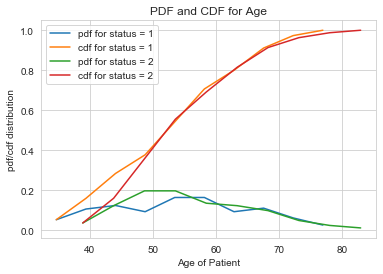

In [119]:
#CDF for column age

print("-----CDF for Age----")
counts, bin_edges = np.histogram(hb_st1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("pdf for status = 1 ", pdf);
print("bins for status = 1 ",bin_edges)

cdf = np.cumsum(pdf)
print("cdf for status = 1 ",cdf)
plt.plot(bin_edges[1:],pdf, label = "pdf for status = 1")
plt.plot(bin_edges[1:], cdf, label = "cdf for status = 1")

counts, bin_edges = np.histogram(hb_st2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("pdf for status = 2 ", pdf);
print("bins for status = 2 ",bin_edges)

cdf = np.cumsum(pdf)
print("cdf for status = 2 ",cdf)
plt.plot(bin_edges[1:],pdf,  label = "pdf for status = 2")
plt.plot(bin_edges[1:], cdf, label = "cdf for status = 2")
plt.title("PDF and CDF for Age")
plt.xlabel("Age of Patient")
plt.ylabel("pdf/cdf distribution")
plt.legend()
plt.show()

**Observation**
* Around 40% people who survived for more than 5 years had their age are less than 50 years.
* 80% of people (who died within 5 year) died within 5 year of operation had age is less than 60 years and more than 40.

-----CDF for year----
pdf for status = 1  [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
bins for status = 1  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
cdf for status = 1  [0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
pdf for status = 2  [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
bins for status = 2  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
cdf for status = 2  [0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]


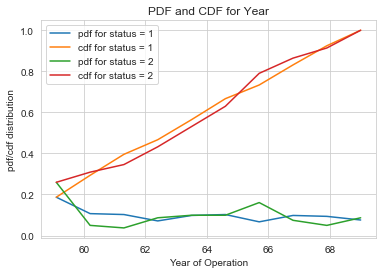

In [118]:
#CDF for column year

print("-----CDF for year----")
counts, bin_edges = np.histogram(hb_st1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("pdf for status = 1 ", pdf);
print("bins for status = 1 ",bin_edges)

cdf = np.cumsum(pdf)
print("cdf for status = 1 ",cdf)
plt.plot(bin_edges[1:],pdf, label = "pdf for status = 1")
plt.plot(bin_edges[1:], cdf, label = "cdf for status = 1")

counts, bin_edges = np.histogram(hb_st2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("pdf for status = 2 ", pdf);
print("bins for status = 2 ",bin_edges)

cdf = np.cumsum(pdf)
print("cdf for status = 2 ",cdf)
plt.plot(bin_edges[1:],pdf, label = "pdf for status = 2")
plt.plot(bin_edges[1:], cdf, label = "cdf for status = 2")
plt.title("PDF and CDF for Year")
plt.xlabel("Year of Operation")
plt.ylabel("pdf/cdf distribution")
plt.legend()
plt.show()

**Observation**
* More than 75% people who survived, their operation were performed before 1966.

-----CDF for nodes----
pdf for status = 1  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
bins for status = 1  [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
cdf for status = 1  [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
pdf for status = 2  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
bins for status = 2  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
cdf for status = 2  [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


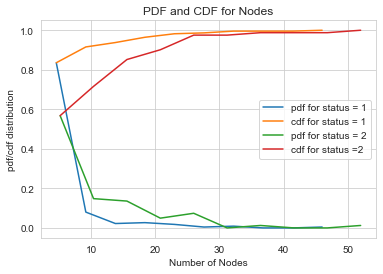

In [117]:
#CDF for column nodes

print("-----CDF for nodes----")
counts, bin_edges = np.histogram(hb_st1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("pdf for status = 1 ", pdf);
print("bins for status = 1 ",bin_edges)

cdf = np.cumsum(pdf)
print("cdf for status = 1 ",cdf)
plt.plot(bin_edges[1:],pdf, label = "pdf for status = 1")
plt.plot(bin_edges[1:], cdf, label = "cdf for status = 1")

counts, bin_edges = np.histogram(hb_st2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("pdf for status = 2 ", pdf);
print("bins for status = 2 ",bin_edges)

cdf = np.cumsum(pdf)
print("cdf for status = 2 ",cdf)
plt.plot(bin_edges[1:],pdf, label = "pdf for status = 2")
plt.plot(bin_edges[1:], cdf, label = "cdf for status =2")
plt.title("PDF and CDF for Nodes")
plt.xlabel("Number of Nodes")
plt.ylabel("pdf/cdf distribution")
plt.legend()
plt.show()

**Observation**
* 91% people who survive have nodes less than 10. 
* Density of number of patients who survived more than 5 years is more near nodes = 0

In [78]:
import numpy as np

print("Patients who lived more than 5 years:")
print("\n quantile of age:")
print(np.percentile(hb_st1["age"],np.arange(0,100,25)))
print("\n quantile of operation year:")
print(np.percentile(hb_st1["year"],np.arange(0,100,25)))
print("\n quantile of axillary nodes:")
print(np.percentile(hb_st1["nodes"],np.arange(0,100,25)))

print("\n")

print("Patients who lived more than 5 years:")
print("\n 90th percentile of age:")
print(np.percentile(hb_st1["age"],90))
print("\n 90th percentile of operation year:")
print(np.percentile(hb_st1["year"],90))
print("\n 90th percentile of axillary nodes:")
print(np.percentile(hb_st1["nodes"],90))

print("\n")

print("Patients who died within 5 years:")
print("\n quantile of age:")
print(np.percentile(hb_st2["age"],np.arange(0,100,25)))
print("\n quantile of operation year:")
print(np.percentile(hb_st2["year"],np.arange(0,100,25)))
print("\n quantile of axillary nodes:")
print(np.percentile(hb_st2["nodes"],np.arange(0,100,25)))

print("\n")

print("Patients who died within 5 years:")
print("\n 90th percentile of age:")
print(np.percentile(hb_st2["age"],90))
print("\n 90th percentile of operation year:")
print(np.percentile(hb_st2["year"],90))
print("\n 90th percentile of axillary nodes:")
print(np.percentile(hb_st2["nodes"],90))

Patients who lived more than 5 years:

 quantile of age:
[30. 43. 52. 60.]

 quantile of operation year:
[58. 60. 63. 66.]

 quantile of axillary nodes:
[0. 0. 0. 3.]


Patients who lived more than 5 years:

 90th percentile of age:
67.0

 90th percentile of operation year:
67.0

 90th percentile of axillary nodes:
8.0


Patients who died within 5 years:

 quantile of age:
[34. 46. 53. 61.]

 quantile of operation year:
[58. 59. 63. 65.]

 quantile of axillary nodes:
[ 0.  1.  4. 11.]


Patients who died within 5 years:

 90th percentile of age:
67.0

 90th percentile of operation year:
67.0

 90th percentile of axillary nodes:
20.0


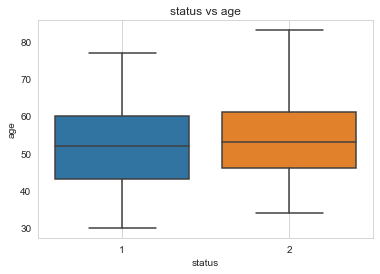

In [90]:
# Box-plot

sns.boxplot(x="status", y="age", data=hb)
plt.title("status vs age")
plt.grid()
plt.show()

**Observation**
* 75% of patients who lived more than 5 years were of age less than 60 years.
* More aged patient is, less chances to live more thaan 5 years.

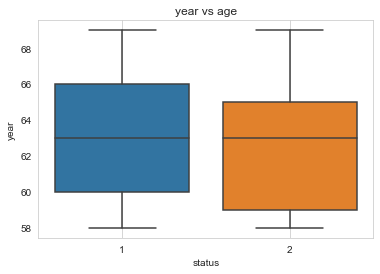

In [91]:
sns.boxplot(x="status", y="year", data=hb)
plt.title("year vs age")
plt.grid()
plt.show()

**Observation**
* We can see that, as the years increases, number of peoples who lived more than 5 years increases.

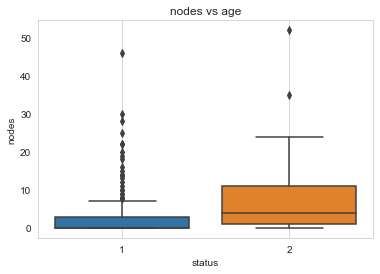

In [92]:
sns.boxplot(x="status", y="nodes", data=hb)
plt.title("nodes vs age")
plt.grid()
plt.show()

**Observation**
* Most of the patients who lived more than 5 years had zero axillary nodes.
* Outlier points are plotted beyond whiskers.

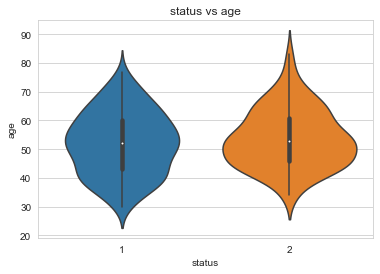

In [106]:
# Violin-plot

sns.violinplot(x="status", y="age", data=hb, height=5)

plt.title("status vs age")

plt.show()

**Observation**
* Upper age limit of people who died within 5 year of treatment is greater than who survived for more than 5 years.

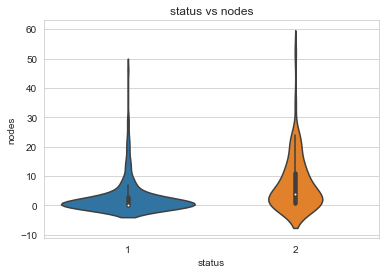

In [108]:
sns.violinplot(x="status", y="nodes", data=hb , height=5)

plt.title("status vs nodes")

plt.show()

**Observation**
* Most of the people who survived more than 5 years has 0 axil nodes.
* The people who died within 5 year has more axil nodes as compared to people who survived for more than 5 years.

## Conclusion:

    1) Most people who survived for more than 5 years has 0 axil nodes.
    2) People who were aged ( greater than 78 years) died within 5 years of operation.
    3) Most of the operation occurs during 1958-1966 and of the age group of 42-55.